# PERDIDOS EN EL ESPACIO:

En nuestro ejercicios buscamos saber en que planeta nos encontramos en cada una de las dos situaciones, únicamente dejando caer una pelota y conociendo la aceleración de la gravedad.

-Caso 1:
    L=1.00 m y t=0.46 s.

-Caso 2:
    L=2.00 m y t=0.66 s. 

Para ello aplicaremos las formulas para encoontrar los valores experimentales de g, sus errores, y compararemos estos datos.

In [39]:
# importamos las librerias necesarias
import pandas 
import faker 
import random 
import numpy 
import pandas as pd
import faker as fk
import random as rd
import numpy as np

In [40]:
# presentamos los planetas y sus gravedades
grav_values = {
    "Tierra": 9.8,
    "Marte": 3.7,
    "Júpiter": 24.8,
    "Saturno": 9.0,
    "Urano": 8.7,
    "Neptuno": 11.0
}

In [41]:
# APARTADO A
L1 = 1.00                       # longitud 
t1 = 0.46                       # tiempo en caer la pelota
g1 = 2*L1 / (t1**2)             # calculo de la aceleración en este caso

print("La aceleración de la gravedad es: ", g1)

La aceleración de la gravedad es:  9.45179584120983


In [42]:
# APARTADO B
L2 = 2.00                       # longitud 
t2 = 0.66                       # tiempo en caer la pelota
g2 = 2*L1 / (t1**2)             # calculo de la aceleración en este caso

print("La aceleración de la gravedad es: ", g2)

La aceleración de la gravedad es:  9.45179584120983


In [45]:
# dataframe de lps datos
df = pd.DataFrame({
    'Longitud': [L1, L2],
    'Tiempo': [t1, t2],
    'Gravedad': [g1, g2],}, index= ['Escenario A', 'Escenario B'])
df

,Longitud,Tiempo,Gravedad
Escenario A,1.0,0.46,9.451796
Escenario B,2.0,0.66,9.451796


# Dataset 
## de las variables que proporciona faker para crear 1000 datos experimentales DE espacio y tiempo.

In [44]:
from faker import Faker

fake_data = Faker()

def create_sample():
    L_value = round(random.uniform(0.8, 2.5), 2)
    t_value = round(random.uniform(0.4, 0.7), 2)
    calc_grav = round((2 * L_value) / (t_value**2), 2)
    
    grav_diffs = {planet: abs(calc_grav - g) for planet, g in grav_values.items()}
 
    sorted_planets_list = sorted(grav_diffs.keys(), key=lambda x: grav_diffs[x])
    
    top_three_planets = sorted_planets_list[:3]

    return {
        "ID": fake_data.uuid4(),
        "Length (m)": L_value,
        "Time (s)": t_value,
        "Calculated Gravity (m/s²)": calc_grav,
        "Most Likely Planet": top_three_planets[0],
        "Second Most Likely": top_three_planets[1],
        "Third Most Likely": top_three_planets[2]
    }


sample_data = [create_sample() for _ in range(1000)]

csv_filename = "planet_dataset.csv"
df = pd.DataFrame(sample_data)
df.to_csv(csv_filename, index=False)

filepath = "planet_dataset.csv"
data_frame = pd.read_csv(filepath)

data_frame.head(1000)

,ID,Length (m),Time (s),Calculated Gravity (m/s²),Most Likely Planet,Second Most Likely,Third Most Likely
0,6029e0be-02b3-489d-9b92-491089d1a2fd,2.07,0.64,10.11,Tierra,Neptuno,Saturno
1,b7fd4091-112f-4c5d-b0e4-317ccae8eb28,1.72,0.53,12.25,Neptuno,Tierra,Saturno
2,e188457a-6b6b-4d66-9af6-5559848b6c60,2.11,0.49,17.58,Neptuno,Júpiter,Tierra
3,97f1ec5b-6203-4bcf-b177-698569087646,2.30,0.55,15.21,Neptuno,Tierra,Saturno
4,919cf949-fed7-44b5-8921-b8ab850e5eee,2.24,0.60,12.44,Neptuno,Tierra,Saturno
...,...,...,...,...,...,...,...
995,5fac7f5b-9ba1-46f9-b561-48e54818a1e9,0.90,0.47,8.15,Urano,Saturno,Tierra
996,f76cea02-0170-4af3-8d3e-2399dc9f58ef,2.38,0.48,20.66,Júpiter,Neptuno,Tierra
997,8ab53c63-579c-4893-bc39-83a846ac85d4,1.60,0.68,6.92,Urano,Saturno,Tierra
998,67b9c189-8692-4d54-a569-1f4412d7fd85,1.37,0.55,9.06,Saturno,Urano,Tierra


# Resolucion de ejercicios

In [59]:
delta_L = 0.01  # m
delta_t = 0.015  # s


dg_dL1 = 2 / t1**2
dg_dt1 = -4 * L1 / t1**3

delta_g1 = np.sqrt((dg_dL1 * delta_L)**2 + (dg_dt1 * delta_t)**2)

df = pd.DataFrame({'Gravedad medida (g)': [g1],
                   'Error en la medición de g': [delta_g1]})

print(df)

lower_range1 = g1 - delta_g1
upper_range1 = g1 + delta_g1

print(f"Rango de valores posibles para g: {lower_range1:.2f} m/s² a {upper_range1:.2f} m/s²\n")


possible_planets1 = [planet for planet, planet_g in grav_values.items() if lower_range1 <= planet_g <= upper_range1]

print("La tripulación podría estar en los siguientes planetas:")
for planet in possible_planets1:
    print(f"  {planet} (g = {grav_values[planet]} m/s²)")


   Gravedad medida (g)  Error en la medición de g
0             9.451796                   0.623626
Rango de valores posibles para g: 8.83 m/s² a 10.08 m/s²

La tripulación podría estar en los siguientes planetas:
  Tierra (g = 9.8 m/s²)
  Saturno (g = 9.0 m/s²)


In [61]:
delta_L = 0.01  # m
delta_t = 0.015  # s

dg_dL2 = 2 / t2**2
dg_dt2 = -4 * L2 / t2**3

delta_g2 = np.sqrt((dg_dL2 * delta_L)**2 + (dg_dt2 * delta_t)**2)

df = pd.DataFrame({'Gravedad medida (g)': [g2],
                   'Error en la medición de g': [delta_g2]})

print(df)

lower_range2 = g2 - delta_g2
upper_range2 = g2 + delta_g2

print(f"Rango de valores posibles para g: {lower_range2:.2f} m/s² a {upper_range2:.2f} m/s²\n")


possible_planets2 = [planet for planet, planet_g in grav_values.items() if lower_range2 <= planet_g <= upper_range2]

print("La tripulación podría estar en los siguientes planetas:")
for planet in possible_planets2:
    print(f"  {planet} (g = {grav_values[planet]} m/s²)")


   Gravedad medida (g)  Error en la medición de g
0             9.451796                   0.419915
Rango de valores posibles para g: 9.03 m/s² a 9.87 m/s²

La tripulación podría estar en los siguientes planetas:
  Tierra (g = 9.8 m/s²)


# Data st para los dos planetas del apartado A que nos ha dado

In [63]:
fake = Faker()

planet_g_values = {
    'Tierra': 9.8,
    'Saturno': 9.0
}

def generate_sample():
    L = round(random.uniform(0.8, 2.5), 2)
    t = round(random.uniform(0.4, 0.7), 2)
    g_calculated = round((2 * L) / (t**2), 2)
    
    g_diffs = {planet: abs(g_calculated - g) for planet, g in planet_g_values.items()}
 
    sorted_planets = sorted(g_diffs.keys(), key=lambda x: g_diffs[x])
    
    top_2_planets = sorted_planets[:2]

    return {
        "ID": fake.uuid4(),
        "Longitud (m)": L,
        "Tiempo (s)": t,
        "g_calculado (m/s²)": g_calculated,
        "Planeta más probable": top_2_planets[0],
        "2do más probable": top_2_planets[1]
    }

dataset = [generate_sample() for _ in range(1000)]

csv_filename = "earth_saturn_dataset.csv"
df.to_csv(csv_filename, index=False)

df = pd.DataFrame(dataset)
df.head(1000)


,ID,Longitud (m),Tiempo (s),g_calculado (m/s²),Planeta más probable,2do más probable
0,06f8d546-1d42-412b-9fb5-0c8da17d9c24,1.48,0.49,12.33,Tierra,Saturno
1,11c378ba-8db4-42d2-8b35-5191b6ab33a5,1.55,0.55,10.25,Tierra,Saturno
2,7c94605a-c2e7-4696-b51e-e84a274ff1e7,1.56,0.59,8.96,Saturno,Tierra
3,07d5004e-c17c-413e-9f34-f06a2eac1997,1.95,0.60,10.83,Tierra,Saturno
4,4cfb77d3-6048-4cad-8eff-cd16f4f538c3,2.10,0.54,14.40,Tierra,Saturno
...,...,...,...,...,...,...
995,10a29088-e274-43aa-98a9-5e29ba8e1e3e,2.47,0.65,11.69,Tierra,Saturno
996,f0116be9-eaed-4710-92e7-784231663a84,1.12,0.48,9.72,Tierra,Saturno
997,2ac638f1-597b-4e46-9b0a-dc80694f08f8,1.46,0.44,15.08,Tierra,Saturno
998,e3409fd4-edf6-4ceb-9170-44b1f1b02611,1.14,0.46,10.78,Tierra,Saturno


# ANALISIS EDA
Creamos y mostramos varios gráficos y análisis para entender el dataset anterior:

-> Histograma de Longitud (m)

-> Histograma de Tiempo (s)

-> Histograma de g_calculado (m/s²)

-> Gráfico de dispersión de g_calculado (m/s²) vs Longitud (m)

-> Gráfico de dispersión de g_calculado (m/s²) vs Tiempo (s)

-> Conteo de los planetas más probables

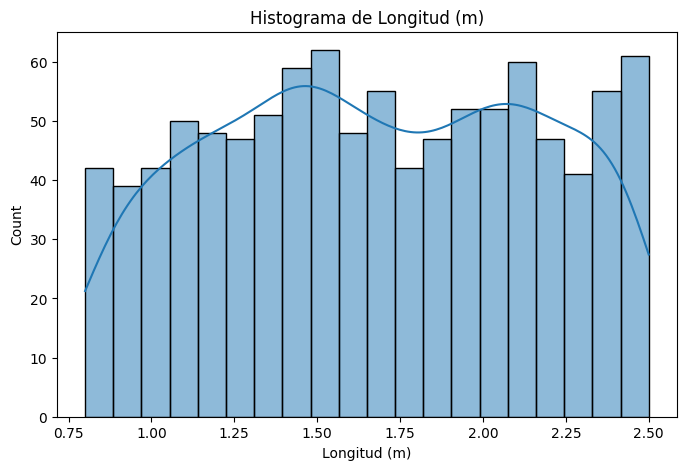

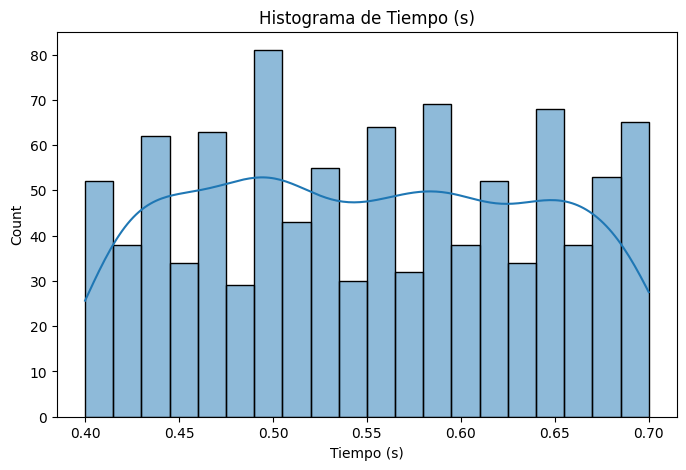

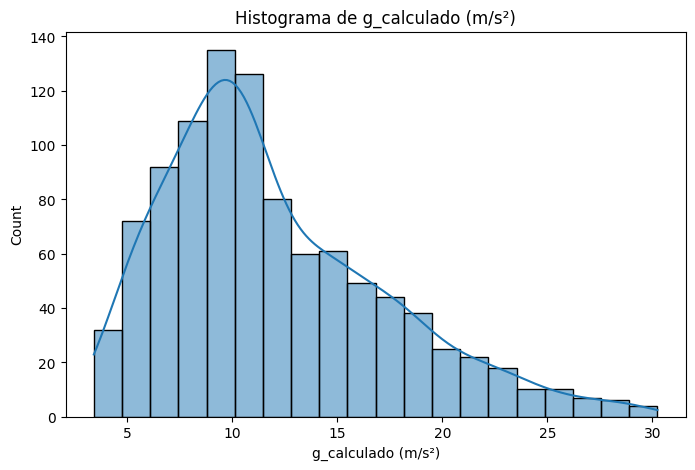

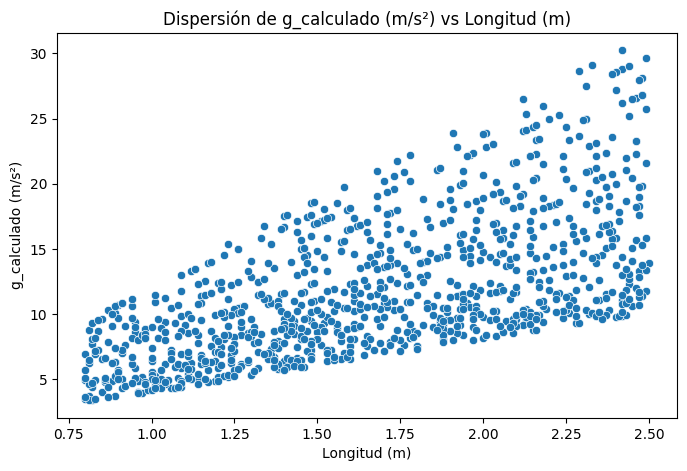

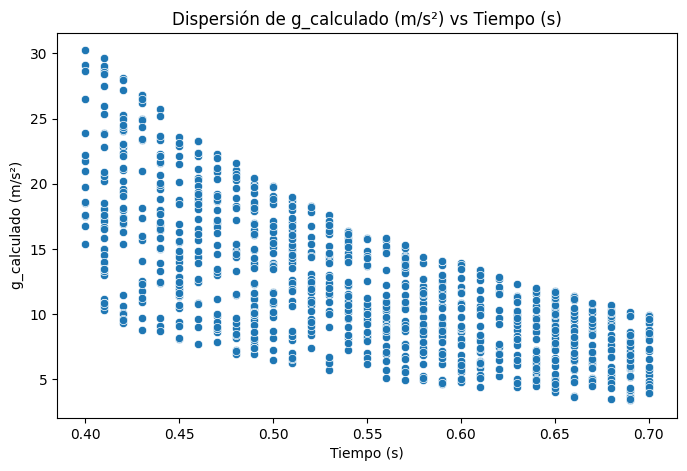

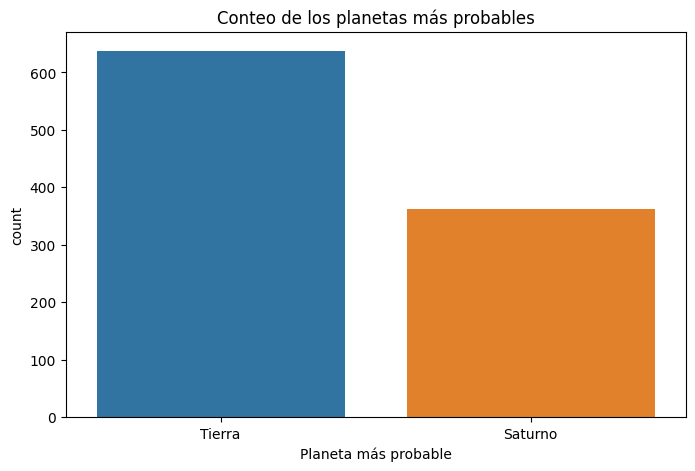

In [64]:
# importamoslas bibliotecas necesarias para ello
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la longitud (L)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Longitud (m)', bins=20, kde=True)
plt.title("Histograma de Longitud (m)")
plt.show()

# Histograma del tiempo (t)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Tiempo (s)', bins=20, kde=True)
plt.title("Histograma de Tiempo (s)")
plt.show()

# Histograma de la gravedad calculada (g_calculado)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='g_calculado (m/s²)', bins=20, kde=True)
plt.title("Histograma de g_calculado (m/s²)")
plt.show()

# Gráfico de dispersión de la gravedad calculada (g_calculado) vs longitud (L)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Longitud (m)', y='g_calculado (m/s²)')
plt.title("Dispersión de g_calculado (m/s²) vs Longitud (m)")
plt.show()

# Gráfico de dispersión de la gravedad calculada (g_calculado) vs tiempo (t)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Tiempo (s)', y='g_calculado (m/s²)')
plt.title("Dispersión de g_calculado (m/s²) vs Tiempo (s)")
plt.show()

# Conteo de los planetas más probables
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Planeta más probable')
plt.title("Conteo de los planetas más probables")
plt.show()